In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [8]:
x, y = sklearn.datasets.make_moons(200, noise = 0.20)
x[:5, :]

array([[ 1.24042095,  0.39825092],
       [-0.69264692, -0.08597644],
       [ 0.39348247,  0.71584367],
       [ 0.68132766, -0.00492047],
       [-1.07779312,  0.45643505]])

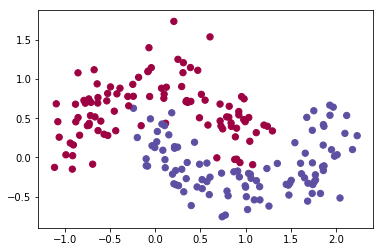

In [9]:
plt.scatter(x[:,0], x[:,1], s = 40, c = y, cmap = plt.cm.Spectral)
plt.show()

In [10]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y) #normally labels are converted to long tensors

In [11]:
x[:5, :], y[:5]

(tensor([[ 1.2404,  0.3983],
         [-0.6926, -0.0860],
         [ 0.3935,  0.7158],
         [ 0.6813, -0.0049],
         [-1.0778,  0.4564]]), tensor([0, 0, 0, 0, 0]))

In [13]:
class FeedForward(torch.nn.Module):
    def __init__(self, inputNeurons, hiddenNeurons, outputNeurons):
        super(FeedForward, self).__init__()
        self.hidden = nn.Linear(inputNeurons, hiddenNeurons)
        self.out = nn.Linear(hiddenNeurons, outputNeurons)
    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x

In [15]:
network = FeedForward(inputNeurons=2, hiddenNeurons=50, outputNeurons=2)
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02) #.parameters() returns the weights
lossFunction = torch.nn.CrossEntropyLoss()

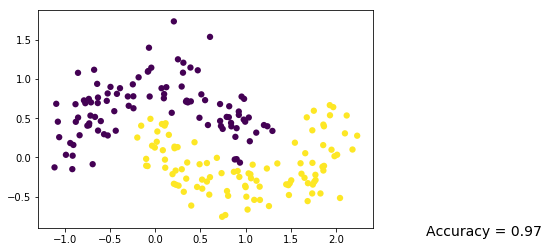

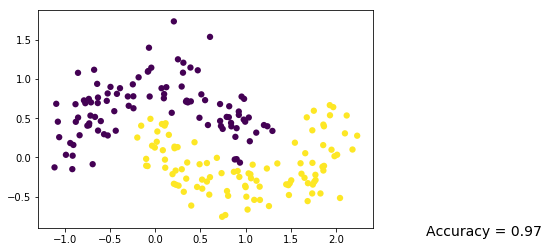

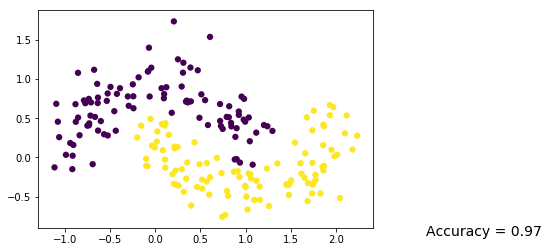

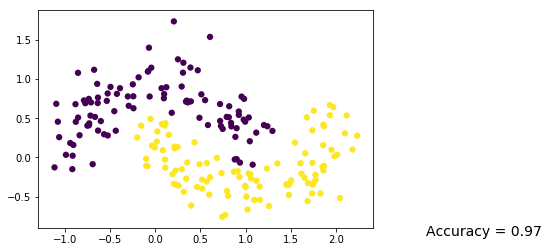

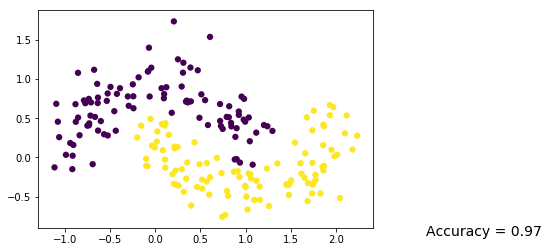

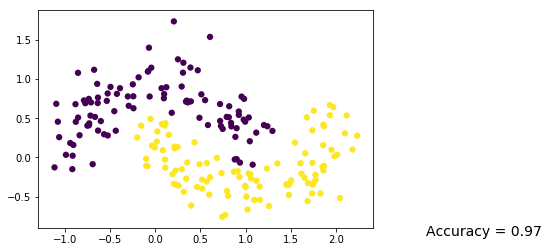

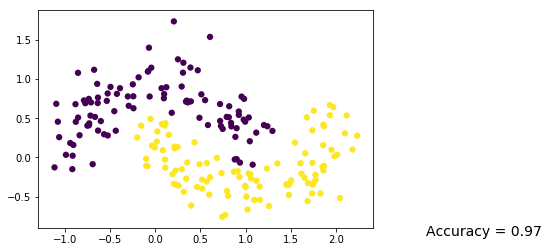

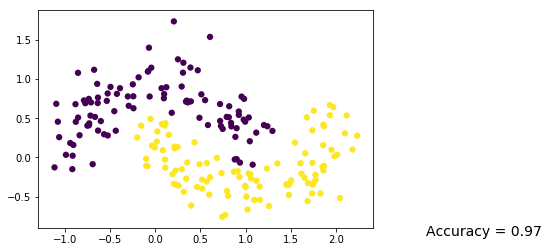

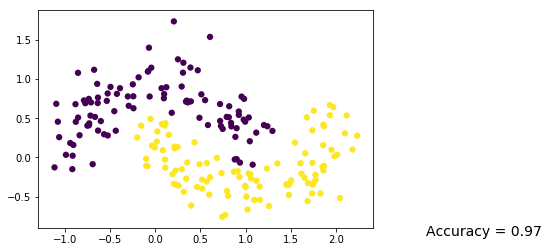

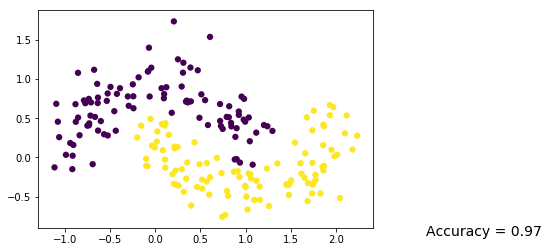

In [17]:
plt.ion() 
for epoch in range(10000):
    out = network(x) # or we can write aswell network.forward(x)
    loss = lossFunction(out, y) #we want to calculate the loss between predictions and labels (actual data)
    optimizer.zero_grad() #before backprop we need to reset the gradients in order to no acumulate them
    loss.backward() #backprop the loss
    optimizer.step() #updates the weights
    
    if epoch % 1000 == 0:
        # show the learning process up until now
        maxValue, prediction = torch.max(out,1) #1 is the axis (columns)
        predictedY = prediction.data.numpy()
        targetY = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], s = 40, c = predictedY, lw=0)
        accuracy = (predictedY == targetY).sum() / targetY.size #we divide in order to noramlize the data
        plt.text(3, -1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size': 14})
        plt.pause(0.1)
plt.ioff()        
plt.show()